## Credit Card Lead Prediction 

This notebook will be describing  machine learning and data science concepts by exploring the problem of credit card lead **classification**.

Classification involves deciding whether a sample is part of one class or another (single-class classification)

Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

<img src="steps.png">

## 1.Problem Defination 

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.
The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 
In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking to identify customers that could show higher intent towards a recommended credit card, given: 

1.Customer details (gender, age, region etc.)

2.Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

## 2.Data 

The datasets are downloaded from the given problem statement

<img src="train_dict.PNG">

<img src="test_dict.PNG">

## 3.Evaluation 

The evaluation metric is something you might define at the start of a project.The evaluation metric for this competition is roc_auc_score.

## 4.Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk.
1. Pandas for data analysis.
2. NumPy for numerical operations.
3. Matplotlib/seaborn for plotting or data visualization.
4. Scikit-Learn for machine learning modelling and evaluation.

In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

Our data is in csv file 

In [2]:
df = pd.read_csv("train_data.csv") # 'DataFrame' shortened to 'df'
df.shape # (rows, columns)

(245725, 11)

## Data Exploration (exploratory data analysis or EDA)

In [3]:
# Let's check the top 5 rows of our dataframe
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
# And the top 10
df.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [5]:

# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [6]:
# Normalized value counts
df.Is_Lead.value_counts(normalize=True)

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

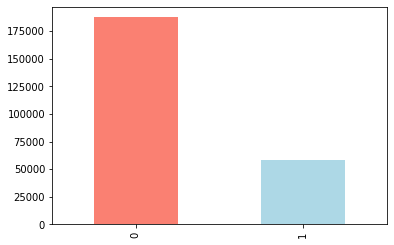

In [7]:
# Plot the value counts with a bar graph
df.Is_Lead.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [8]:
df.info() #df.info() shows a quick insight to the number of missing values you have and what type of data your working with.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [9]:
df.isnull().sum() #Checking For null values 

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

Here we can find Credit_product has 29325 null values 

In [10]:
df.Gender.value_counts() #Checking no of males and females 

Male      134197
Female    111528
Name: Gender, dtype: int64

In [11]:
pd.crosstab(df.Is_Lead, df.Gender) 

Gender,Female,Male
Is_Lead,,
0,88823,98614
1,22705,35583


Text(0, 0.5, 'No of Customers')

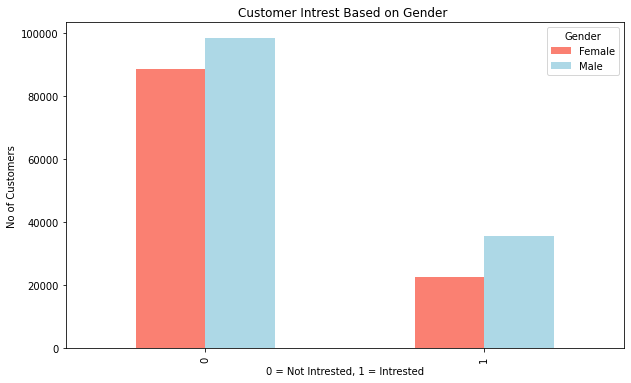

In [12]:
# Create a plot
pd.crosstab(df.Is_Lead, df.Gender).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue"]);
# Add some attributes to it
plt.title("Customer Intrest Based on Gender ")
plt.xlabel("0 = Not Intrested, 1 = Intrested")
plt.ylabel("No of Customers")

In [13]:
df.Region_Code.value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [14]:
pd.crosstab(df.Is_Lead, df.Region_Code)

Region_Code,RG250,RG251,RG252,RG253,RG254,RG255,RG256,RG257,RG258,RG259,...,RG275,RG276,RG277,RG278,RG279,RG280,RG281,RG282,RG283,RG284
Is_Lead,,,,,,,,,,,,,,,,,,,,,
0,2103,4569,3694,1377,21127,1549,2446,4931,1521,2085,...,2702,1996,9851,1422,3079,9766,3979,4709,20531,13504
1,393,1381,592,481,5713,469,401,1170,430,501,...,543,768,2975,400,897,3009,1114,1120,8885,5816


In [15]:
df.Occupation.value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

Text(0, 0.5, 'No of Customers')

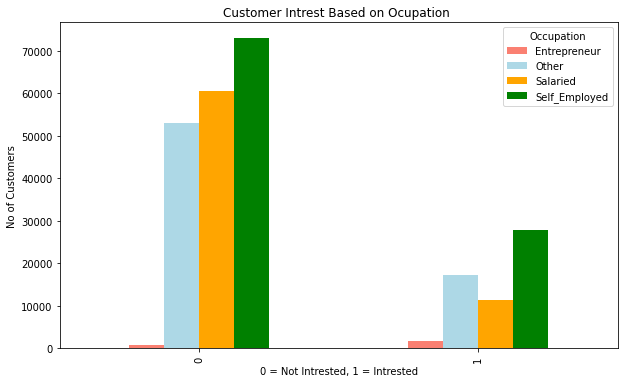

In [16]:
# Create a plot
pd.crosstab(df.Is_Lead, df.Occupation).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue","orange","green"]);
# Add some attributes to it
plt.title("Customer Intrest Based on Ocupation ")
plt.xlabel("0 = Not Intrested, 1 = Intrested")
plt.ylabel("No of Customers")

In [17]:
df.Channel_Code.value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

Text(0, 0.5, 'No of Customers')

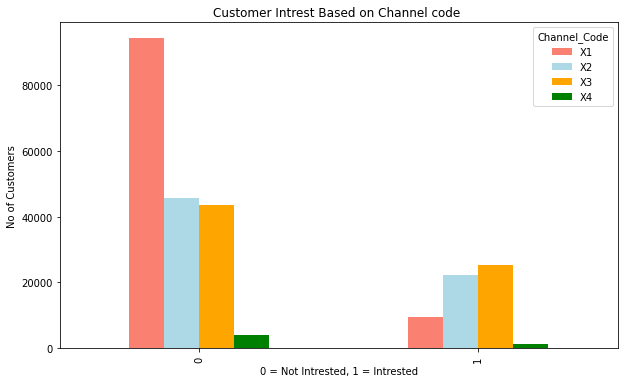

In [18]:
# Create a plot
pd.crosstab(df.Is_Lead, df.Channel_Code).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["salmon", "lightblue","orange","green"]);
# Add some attributes to it
plt.title("Customer Intrest Based on Channel code ")
plt.xlabel("0 = Not Intrested, 1 = Intrested")
plt.ylabel("No of Customers")

In [19]:
df.Vintage.value_counts()

13     12338
21     12277
14     12267
15     12242
19     12212
       ...  
128      501
129      499
135       19
133       18
134       14
Name: Vintage, Length: 66, dtype: int64

In [20]:
pd.crosstab(df.Is_Lead, df.Vintage)

Vintage,7,8,9,13,14,15,19,20,21,25,...,117,121,122,123,127,128,129,133,134,135
Is_Lead,,,,,,,,,,,,,,,,,,,,,
0,501,484,490,10499,10463,10501,10370,10316,10502,9249,...,925,670,674,658,329,313,336,15,8,15
1,147,135,148,1839,1804,1741,1842,1716,1775,1582,...,507,337,301,354,199,188,163,3,6,4


In [21]:
df.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [22]:
df.Credit_Product.isnull().sum()

29325

In [23]:
pd.crosstab(df.Is_Lead, df.Is_Active)

Is_Active,No,Yes
Is_Lead,,
0,119007,68430
1,31283,27005


## Splitting the Data into X & y


In [24]:
# Everything except target variable
X=df.drop(["Is_Lead","ID"],axis=1)

# Target variable
y=df["Is_Lead"]


In [25]:
X.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No


In [26]:
X.Credit_Product.isna().sum()

29325

In [27]:
X["Credit_Product"].fillna("missing",inplace=True)

In [28]:
X.Credit_Product.isna().sum()

0

In [29]:
X.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No


In [30]:
#Turning the Catogeries into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Gender", "Region_Code" ,"Occupation" ,"Channel_Code", "Credit_Product", "Is_Active"]
one_hot=OneHotEncoder()

transformer=ColumnTransformer([("one_hot",
                                 one_hot,categorical_features)], remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X.todense()

matrix([[1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 7.300000e+01,
         4.300000e+01, 1.045696e+06],
        [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 3.000000e+01,
         3.200000e+01, 5.819880e+05],
        [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 5.600000e+01,
         2.600000e+01, 1.484315e+06],
        ...,
        [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 2.600000e+01,
         1.300000e+01, 6.706590e+05],
        [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 2.800000e+01,
         3.100000e+01, 4.075040e+05],
        [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 2.900000e+01,
         2.100000e+01, 1.129276e+06]])

In [31]:
pd.DataFrame(transformed_X.todense()) 

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,73.0,43.0,1045696.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30.0,32.0,581988.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,56.0,26.0,1484315.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,34.0,19.0,470454.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,30.0,33.0,886787.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,51.0,109.0,1925586.0
245721,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,27.0,15.0,862952.0
245722,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,26.0,13.0,670659.0
245723,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,28.0,31.0,407504.0


In [32]:
X_new=pd.get_dummies(X[["Gender","Age","Region_Code" ,"Occupation" ,"Channel_Code","Vintage","Credit_Product","Avg_Account_Balance", "Is_Active"]])
X_new                       


,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,...,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_missing,Is_Active_No,Is_Active_Yes
0,73,43,1045696,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,30,32,581988,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,56,26,1484315,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,34,19,470454,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,30,33,886787,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,51,109,1925586,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,0
245721,27,15,862952,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
245722,26,13,670659,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
245723,28,31,407504,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## Training and test split

we are using training set to train your model and test set to test it.

The test set must remain separate from your training set.

To split our data into a training and test set, we can use Scikit-Learn's train_test_split() and feed it our independent and dependent variables (X & y).

In [33]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X_new, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.3) # percentage of data to use for test set

## Model choices

Now we've got our data prepared, we can start to fit models. 
We'll be using the following and comparing their results.

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

Why these?
If we look at the Scikit-Learn algorithm cheat sheet, 
we can see we're working on a classification problem and these are the algorithms it suggests (plus a few more).

In [34]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [35]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.7291299275617895,
 'Logistic Regression': 0.7631785995279308,
 'Random Forest': 0.8501044521012507}

# Model Comparision 

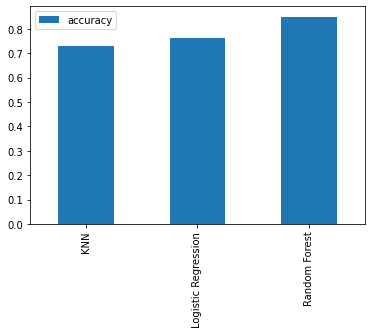

In [36]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(); #comparision between 3 models 

In [37]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

# Hyperparameter Tuning and Corss validation

Tune KNeighborsClassifier (K-Nearest Neighbors or KNN) by hand

There's one main hyperparameter we can tune for the K-Nearest Neighbors (KNN) algorithm, and that is number of neighbours. The default is 5 (n_neigbors=5).


In [38]:
train_scores

[0.9999941862831164,
 0.8358206352067067,
 0.8363787520275338,
 0.7998046591127105,
 0.8014615684245409,
 0.7854738469945991,
 0.7868168155947142,
 0.776183527414582,
 0.777392780526374,
 0.7712302406297418,
 0.772573209229857,
 0.7681547843983094,
 0.7688582441412268,
 0.7661606795072293,
 0.7663932281825739,
 0.7646200445330713,
 0.7647770148889289,
 0.763945653374572,
 0.7642072706343347,
 0.7635154383251844]

Maximum KNN score on the test data: 76.16%


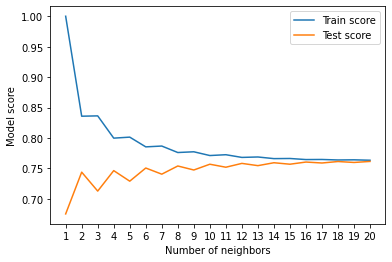

In [39]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Looking at the graph, n_neighbors = 20 seems best.

The KNN's model performance  got near what LogisticRegression but far from  the RandomForestClassifier did.

Because of this, we'll discard KNN and focus on the other two.

We've tuned KNN by hand but let's see how we can LogisticsRegression and RandomForestClassifier using RandomizedSearchCV.

Instead of us having to manually try different hyperparameters by hand, RandomizedSearchCV tries a number of different combinations, evaluates them and saves the best.

# Tuning models with with RandomizedSearchCV
Reading the Scikit-Learn documentation for LogisticRegression, we find there's a number of different hyperparameters we can tune.

The same for RandomForestClassifier.

Let's create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.

In [40]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now let's use RandomizedSearchCV to try and tune our LogisticRegression model.

We'll pass it the different hyperparameters from log_reg_grid as well as set n_iter = 20. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [41]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   36.9s finished


In [42]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0001}

In [43]:
rs_log_reg.score(X_test, y_test)

0.7631785995279308

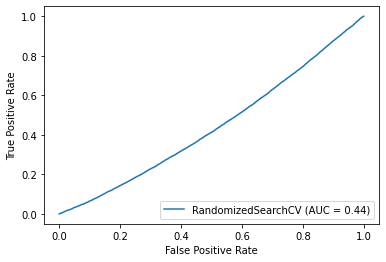

In [44]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_log_reg, X_test, y_test);

Now we've tuned LogisticRegression using RandomizedSearchCV, we'll do the same for RandomForestClassifier.

In [45]:
#setup Random seed
rf_grid2= {"n_estimators": np.arange(10,100,50),
      "max_depth": [None,3,5,10],
      "min_samples_split": np.arange(2,20,2),
      "min_samples_leaf" : np.arange(1,20,2)
}

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid2,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.6min finished


In [46]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_depth': None}

In [47]:
rs_rf.score(X_test,y_test)

0.8592067066388128

 Tuning the hyperparameters for each model saw a slight performance boost in both the RandomForestClassifier and LogisticRegression.
 
So comparing all models we can justify Random Forest Classifier as better model to approach.
Lets fit the model using best params

In [48]:
from sklearn.model_selection import cross_val_score #fitting the model using best parms 
clf = RandomForestClassifier(n_estimators= 60,
                             min_samples_split=2,
                             min_samples_leaf=17,
                             max_depth= None)

In [49]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
clf.score(X_test,y_test)

0.8596950541251798

In [51]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X_new,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.85976193, 0.85988402, 0.85951775, 0.85961949, 0.86169498])

In [52]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8600956353647371

ROC Curve and AUC Scores
What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.


Scikit-Learn implements a function plot_roc_curve which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.

Reading the documentation on the plot_roc_curve function we can see it takes (estimator, X, y) as inputs. Where estiamator is a fitted machine learning model and X and y are the data you'd like to test it on.

AUC: 0.891
True Positive Rate - [0.0000000e+00 1.7156190e-05 1.3724952e-04 ... 1.0000000e+00 1.0000000e+00
 1.0000000e+00], False Positive Rate - [0.         0.         0.         ... 0.9998933  0.99990397 1.        ] Thresholds - [1.98697774 0.98697774 0.98445372 ... 0.00606426 0.00604988 0.00395012]


Text(0, 0.5, 'True Positive Rate')

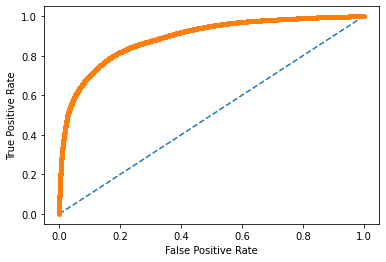

In [53]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = clf.predict_proba(X_new)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [56]:
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

 ## Confusion matrix
A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).

Scikit-Learn allows us to create a confusion matrix using confusion_matrix() and passing it the true labels and predicted labels.

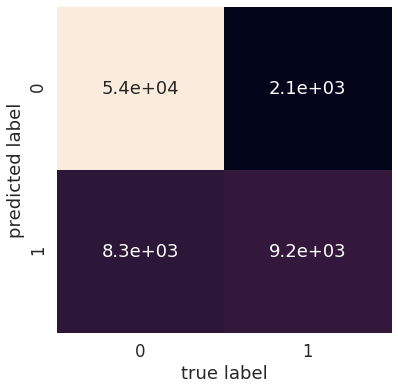

In [58]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

## Classification report
We can make a classification report using classification_report() and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [59]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     56260
           1       0.82      0.53      0.64     17458

    accuracy                           0.86     73718
   macro avg       0.84      0.74      0.78     73718
weighted avg       0.86      0.86      0.85     73718



## Feature importance
Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

In [60]:
clf.feature_importances_

array([6.23842833e-02, 9.69156923e-02, 1.99905405e-02, 1.94952044e-03,
       2.60420778e-03, 1.60000044e-04, 4.35412558e-04, 2.29336905e-04,
       1.58770407e-04, 1.09046759e-03, 1.06313298e-04, 1.32975097e-04,
       3.18072525e-04, 1.05209649e-04, 1.41152355e-04, 1.45171311e-04,
       4.13480244e-04, 1.20096781e-04, 3.02932282e-04, 1.53992750e-04,
       6.59192704e-05, 6.40743132e-05, 8.15713184e-05, 2.13200287e-03,
       5.03432249e-04, 3.04281933e-04, 8.07794125e-05, 3.30312826e-04,
       2.71505908e-04, 2.54619241e-04, 1.81879631e-04, 1.85522640e-04,
       7.72597711e-04, 9.76323881e-05, 2.27269477e-04, 6.39799918e-04,
       3.12519138e-04, 2.75688041e-04, 1.93465326e-03, 1.09440403e-03,
       4.90690697e-03, 8.22354732e-03, 3.04644849e-02, 7.05833779e-03,
       5.35566465e-02, 1.32875368e-02, 1.81271547e-02, 9.23194857e-04,
       2.30110993e-01, 6.95904966e-02, 3.45884240e-01, 1.03926480e-02,
       9.80571887e-03])

In [68]:
features_dict = dict(zip(X_train.columns, list(clf.feature_importances_)))
features_dict

{'Age': 0.06238428333804352,
 'Vintage': 0.09691569228297822,
 'Avg_Account_Balance': 0.019990540519454297,
 'Gender_Female': 0.0019495204432708566,
 'Gender_Male': 0.0026042077826079484,
 'Region_Code_RG250': 0.00016000004424896312,
 'Region_Code_RG251': 0.00043541255795847075,
 'Region_Code_RG252': 0.00022933690500046206,
 'Region_Code_RG253': 0.00015877040672977958,
 'Region_Code_RG254': 0.001090467593217863,
 'Region_Code_RG255': 0.00010631329828161421,
 'Region_Code_RG256': 0.00013297509652038635,
 'Region_Code_RG257': 0.0003180725252329219,
 'Region_Code_RG258': 0.0001052096491762464,
 'Region_Code_RG259': 0.0001411523549286317,
 'Region_Code_RG260': 0.00014517131090513154,
 'Region_Code_RG261': 0.00041348024402658787,
 'Region_Code_RG262': 0.00012009678070155737,
 'Region_Code_RG263': 0.00030293228166830316,
 'Region_Code_RG264': 0.00015399275031335193,
 'Region_Code_RG265': 6.591927039676055e-05,
 'Region_Code_RG266': 6.407431321947954e-05,
 'Region_Code_RG267': 8.1571318360744

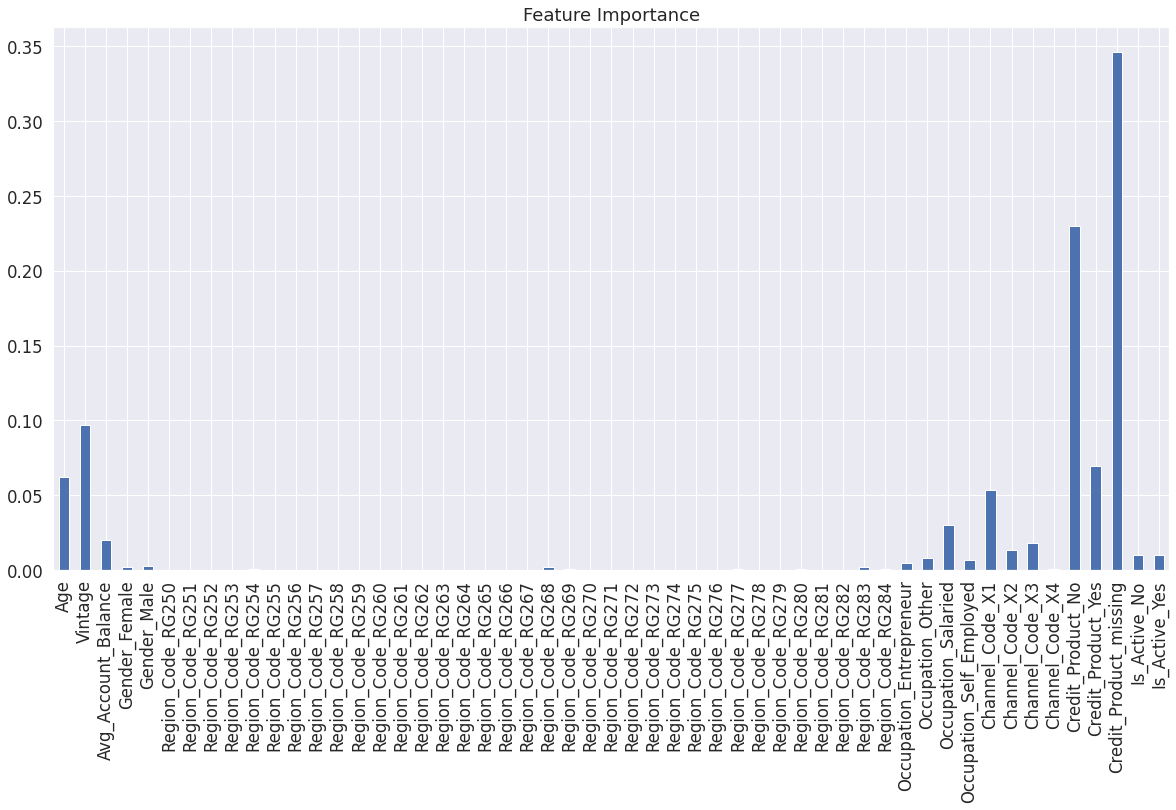

In [78]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False,figsize=(20, 10));

As we have done with modelling the data lets predict it with our test set

In [79]:
#Preprocessing data 

def preprocess_data(XX):

    
    XX["Credit_Product"].fillna("missing",inplace=True)
    
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer

    categorical_features = ["Gender", "Region_Code" ,"Occupation" ,"Channel_Code", "Credit_Product", "Is_Active"]
    one_hot=OneHotEncoder()

    transformer=ColumnTransformer([("one_hot",
                                 one_hot,categorical_features)], remainder="passthrough")
    transformed_X = transformer.fit_transform(XX)
    transformed_X.todense()
    
    pd.DataFrame(transformed_X.todense())
    
    X_new=pd.get_dummies(XX[["Gender","Age","Region_Code" ,"Occupation" ,"Channel_Code","Vintage","Credit_Product","Avg_Account_Balance", "Is_Active"]])
    X_new
    
    return X_new

    
    

In [80]:
df_test = pd.read_csv("test_data.csv") # 'DataFrame' shortened to 'df'
df_test.shape # (rows, columns)

(105312, 10)

In [81]:
df_test.isnull().sum() #check for null values 

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [ ]:
df_test.head()

In [95]:
df_test1=df_test.drop("ID",axis=1)
df_test1 #Dropping the test data column

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...
105307,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,Male,53,RG254,Other,X3,93,No,737178,Yes


In [96]:
#Preprocessing Data

df_test_processed=preprocess_data(df_test1)
df_test_processed #Preprocessing the data

,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,...,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_missing,Is_Active_No,Is_Active_Yes
0,29,25,742366,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1,43,49,925537,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,31,14,215949,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,29,33,868070,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,29,19,657087,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,52,86,4242558,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
105308,55,86,1159153,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
105309,35,15,1703727,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
105310,53,93,737178,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [97]:
X_train.head()

,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,...,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_missing,Is_Active_No,Is_Active_Yes
138403,30,20,1726840,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
117015,55,37,303187,1,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
322,33,13,886813,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
64910,48,92,1227416,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
39919,31,19,717553,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [98]:
df_test_processed.head()

,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,...,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Credit_Product_missing,Is_Active_No,Is_Active_Yes
0,29,25,742366,0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1,43,49,925537,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,31,14,215949,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,29,33,868070,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,29,19,657087,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [99]:
X_train.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Gender_Female', 'Gender_Male',
       'Region_Code_RG250', 'Region_Code_RG251', 'Region_Code_RG252',
       'Region_Code_RG253', 'Region_Code_RG254', 'Region_Code_RG255',
       'Region_Code_RG256', 'Region_Code_RG257', 'Region_Code_RG258',
       'Region_Code_RG259', 'Region_Code_RG260', 'Region_Code_RG261',
       'Region_Code_RG262', 'Region_Code_RG263', 'Region_Code_RG264',
       'Region_Code_RG265', 'Region_Code_RG266', 'Region_Code_RG267',
       'Region_Code_RG268', 'Region_Code_RG269', 'Region_Code_RG270',
       'Region_Code_RG271', 'Region_Code_RG272', 'Region_Code_RG273',
       'Region_Code_RG274', 'Region_Code_RG275', 'Region_Code_RG276',
       'Region_Code_RG277', 'Region_Code_RG278', 'Region_Code_RG279',
       'Region_Code_RG280', 'Region_Code_RG281', 'Region_Code_RG282',
       'Region_Code_RG283', 'Region_Code_RG284', 'Occupation_Entrepreneur',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employe

In [100]:
df_test_processed.columns

Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Gender_Female', 'Gender_Male',
       'Region_Code_RG250', 'Region_Code_RG251', 'Region_Code_RG252',
       'Region_Code_RG253', 'Region_Code_RG254', 'Region_Code_RG255',
       'Region_Code_RG256', 'Region_Code_RG257', 'Region_Code_RG258',
       'Region_Code_RG259', 'Region_Code_RG260', 'Region_Code_RG261',
       'Region_Code_RG262', 'Region_Code_RG263', 'Region_Code_RG264',
       'Region_Code_RG265', 'Region_Code_RG266', 'Region_Code_RG267',
       'Region_Code_RG268', 'Region_Code_RG269', 'Region_Code_RG270',
       'Region_Code_RG271', 'Region_Code_RG272', 'Region_Code_RG273',
       'Region_Code_RG274', 'Region_Code_RG275', 'Region_Code_RG276',
       'Region_Code_RG277', 'Region_Code_RG278', 'Region_Code_RG279',
       'Region_Code_RG280', 'Region_Code_RG281', 'Region_Code_RG282',
       'Region_Code_RG283', 'Region_Code_RG284', 'Occupation_Entrepreneur',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employe

In [101]:
test_preds = rs_rf.predict(df_test_processed)
test_preds #test set prediction 

array([0, 1, 0, ..., 0, 0, 0])

In [102]:
test_preds.shape

(105312,)

In [103]:
df_test.shape

(105312, 10)

In [105]:
df_preds=pd.DataFrame()  # making a data frame 
df_preds["ID"]=df_test["ID"]
df_preds["Is_Lead"]=test_preds
df_preds


,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,1
105308,CWQ72DWS,1
105309,HDESC8GU,0
105310,2PW4SFCA,0


AUC: 1.000
True Positive Rate - [0.00000000e+00 6.23596907e-05 3.36742330e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00], False Positive Rate - [0.         0.         0.         ... 0.99896949 0.99899189 1.        ] Thresholds - [1.98735397 0.98735397 0.9774819  ... 0.00840795 0.00839879 0.00453696]


Text(0, 0.5, 'True Positive Rate')

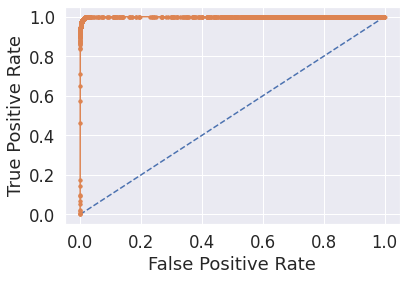

In [106]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = clf.predict_proba(df_test_processed)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(test_preds, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(test_preds, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [107]:
#Exporting Prediction Data
df_preds.to_csv("test_predictions.csv",index=False)